In [86]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import re
from mpl_toolkits import mplot3d
import pandas as pd
import os
import glob

n_users = 182
column_names = ["Latitude", "Longitude", "Zeros", "Altitude", "Unix_Day", "Date", "Time"]

In [84]:
def plotLocation(path):
    data = np.genfromtxt(path, delimiter=',', dtype=(float, float, float,float,float,object,object),skip_header=6)

    latitude = []
    longitude=[]
    time_list = []
                         
    for row in data:
        
        date = row[5].decode("utf-8") + " " + row[6].decode("utf-8")
        my_time = time.mktime(time.strptime(date, '%Y-%m-%d %H:%M:%S')) # convert to timestamp
        
        ts = pd.to_datetime(my_time, unit='s')
        hour = ts.hour
        
        latitude.append(row[0])
        longitude.append(row[1])


        time_list.append(ts.hour)
                         
    return latitude, longitude,time_list


def read_all_trajectories():
    
    all_users = []
    
    users_strings = ["{0:03}".format(i) for i in range(n_users)]

    for i in range(n_users):
        print("reading user {} data".format(i+1))
        all_users.append({})
        user_dir = os.getcwd() + "\\Geolife Trajectories 1.3\\Data\\" + users_strings[i]
        user_data_dir = user_dir + "\\Trajectory\\"
        
        data_list = glob.glob(user_data_dir + "*.plt")
                
        for j in range(len(data_list)):
            file_key = data_list[j][101:115]
            all_users[i][file_key] = pd.read_csv(data_list[j], names= column_names, skiprows=6)
    
    return all_users

def read_one_user_trajectories(m):
    
    user = {}
    user_string = "{0:03}".format(m)
    user_dir = os.getcwd() + "\\Geolife Trajectories 1.3\\Data\\" + user_string
    user_data_dir = user_dir + "\\Trajectory\\"
    data_list = glob.glob(user_data_dir + "*.plt")
    
    for j in range(len(data_list)):
        file_key = data_list[j][101:115]
        user[file_key] = pd.read_csv(data_list[j], names= column_names, skiprows=6)
        
    return user
    

In [87]:
##Reading all users data
#users = readdata_plt()
##Reading one user data
user_10 = read_one_user_trajectories(10)
#user_10

{'20070804033032':        Latitude   Longitude  Zeros  Altitude      Unix_Day        Date  \
 0     39.921712  116.472343      0        13  39298.146204  2007-08-04   
 1     39.921705  116.472343      0        13  39298.146215  2007-08-04   
 2     39.921695  116.472345      0        13  39298.146227  2007-08-04   
 3     39.921683  116.472342      0        13  39298.146238  2007-08-04   
 4     39.921672  116.472342      0        13  39298.146250  2007-08-04   
 5     39.921583  116.472315      0        13  39298.146273  2007-08-04   
 6     39.921572  116.472315      0        13  39298.146285  2007-08-04   
 7     39.921560  116.472290      0        13  39298.146296  2007-08-04   
 8     39.921565  116.472290      0        13  39298.146308  2007-08-04   
 9     39.921570  116.472288      0        13  39298.146319  2007-08-04   
 10    39.921577  116.472300      0        13  39298.146331  2007-08-04   
 11    39.921580  116.472307      0        13  39298.146343  2007-08-04   
 12    

In [64]:
#la1, lo1, t1 = plotLocation('.//Geolife_Trajectories_1.3//Data//000//Trajectory//20081023025304.plt')
#os.getcwd()
#os.getcwd()+ "\\Geolife_Trajectories_1.3\\Data\\000\\Trajectory\\20081023025304.plt"
#glob.glob("C:/Users/14342/Documents/GitHub/Connected-Steps-Project/Geolife_Trajectories_1.3/Data//000/Trajectory/*.plt")
glob.glob('C:/Users/14342/Documents/GitHub/Connected-Steps-Project/Geolife Trajectories 1.3/Data/000/Trajectory/*.plt')

['C:/Users/14342/Documents/GitHub/Connected-Steps-Project/Geolife Trajectories 1.3/Data/000/Trajectory\\20081023025304.plt',
 'C:/Users/14342/Documents/GitHub/Connected-Steps-Project/Geolife Trajectories 1.3/Data/000/Trajectory\\20081024020959.plt',
 'C:/Users/14342/Documents/GitHub/Connected-Steps-Project/Geolife Trajectories 1.3/Data/000/Trajectory\\20081026134407.plt',
 'C:/Users/14342/Documents/GitHub/Connected-Steps-Project/Geolife Trajectories 1.3/Data/000/Trajectory\\20081027115449.plt',
 'C:/Users/14342/Documents/GitHub/Connected-Steps-Project/Geolife Trajectories 1.3/Data/000/Trajectory\\20081028003826.plt',
 'C:/Users/14342/Documents/GitHub/Connected-Steps-Project/Geolife Trajectories 1.3/Data/000/Trajectory\\20081029092138.plt',
 'C:/Users/14342/Documents/GitHub/Connected-Steps-Project/Geolife Trajectories 1.3/Data/000/Trajectory\\20081029093038.plt',
 'C:/Users/14342/Documents/GitHub/Connected-Steps-Project/Geolife Trajectories 1.3/Data/000/Trajectory\\20081103101336.plt',


In [60]:
#la1, lo1, t1 = plotLocation(os.getcwd()+"\\Geolife_Trajectories_1.3\\Data\\000\\Trajectory\\20081023025304.plt")
os.getcwd()

'C:\\Users\\14342\\Documents\\GitHub\\Connected-Steps-Project'

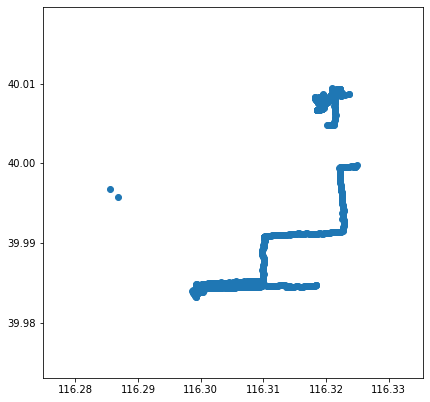

In [4]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(2, 2, 1)
ax.scatter(lo1, la1)

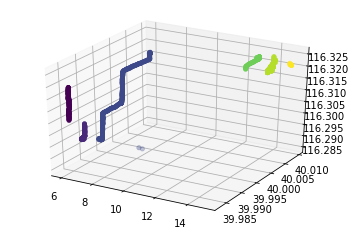

In [5]:
# 3D plot with x-axis = time    
    ax = plt.axes(projection='3d')
    ax.scatter(t1, la1, lo1, c = t1,cmap='viridis', linewidth=0.5);
    plt.show()